# Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [1]:
import pandas as pd

Next we will import each of the three tables and assign names to each of the columns:

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')


Let's take a look at the first 5 rows of each table:

In [3]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to
use as the merge (or join) keys based on overlapping names:

In [6]:
data = pd.merge(pd.merge(ratings, users), movies)

Below is the first row in that dataset

In [7]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [8]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [9]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):

In [10]:
ratings_by_title = data.groupby('title').size()

In [11]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [12]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [13]:
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [14]:
mean_ratings = mean_ratings.ix[active_titles]

In [15]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers, we can sort by the F column in descending order:

In [16]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [17]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Likewise, for male viewers:

In [18]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [19]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [20]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [21]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [22]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [23]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


___
___
___

## Assignment 1

An aggregate of the movie ratings for each particular genre:

For a parallel analysis, we'll split up the compound genres into separate rows.

In [24]:
genres = movies.genres.str.split('|', expand=True).stack()
g_index = genres.index.get_level_values(0)
movies_split_genres = movies.loc[g_index].copy()
movies_split_genres["genres"] = genres.values
split_data = pd.merge(pd.merge(ratings, users), movies_split_genres)

In [25]:
import numpy as np
movie_stats = data.groupby('genres').agg({'rating': [np.size, np.mean]})
movie_stats.sort_values([('rating', 'mean')], ascending=False)

rating          
                                                size      mean
genres                                                        
Animation|Comedy|Thriller                        688  4.473837
Sci-Fi|War                                      1367  4.449890
Animation                                        459  4.394336
Film-Noir|Mystery                               1584  4.367424
Adventure|War                                   1644  4.346107
Film-Noir|Romance|Thriller                       445  4.294382
Action|Adventure|Drama|Sci-Fi|War               2990  4.292977
Film-Noir|Sci-Fi                                1800  4.273333
Crime|Film-Noir                                  867  4.264129
Film-Noir                                        802  4.258105
Action|Adventure|Romance|War                    1057  4.251656
Adventure|Children's|Drama|Musical              1718  4.247963
Drama|Film-Noir                                  628  4.218153
Film-Noir|Thriller                              1983  4.206757
Crime|Film-Noir|Mystery                          292  4.202055
Comedy|Mystery|Romance|Thriller                  505  4.184158
Comedy|Drama|Musical                            1118  4.179785
Comedy|Mystery|Thriller                          672  4.168155
Action|Adventure|Animation                       345  4.147826
Comedy|Drama|Western                             807  4.141264
Crime|Film-Noir|Mystery|Thriller                2667  4.126734
Action|Sci-Fi|Thriller|War                      1820  4.125824
Action|Crime|Drama                              6809  4.110883
Drama|War                                      14656  4.098936
Adventure|Comedy|Drama                          1785  4.096919
Comedy|Romance|War                              2194  4.087967
Crime|Drama|Film-Noir|Thriller                   461  4.082430
Action|Western                                  1344  4.079613
Drama|Mystery|Sci-Fi|Thriller                   1716  4.068765
Action|Drama|Mystery|Romance|Thriller            257  4.054475
...                                              ...       ...
Adventure|Animation|Children's|Fantasy            68  2.779412
Children's|Fantasy                                27  2.777778
Action|Comedy|Romance|Thriller                   374  2.770053
Action|Crime|Mystery|Thriller                    495  2.745455
Horror|Mystery                                   102  2.745098
Horror|Sci-Fi|Thriller                          1504  2.726729
Action|Adventure|Animation|Children's|Fantasy    135  2.703704
Adventure|Children's|Comedy                      784  2.700255
Crime|Horror|Thriller                            264  2.651515
Adventure|Sci-Fi|Thriller                        674  2.620178
Adventure|Animation|Children's|Comedy|Fantasy    563  2.619893
Action|Comedy|Musical|Sci-Fi                     358  2.614525
Adventure|Children's|Drama                       823  2.597813
Adventure|Comedy|Musical                         471  2.594480
Action|Comedy|Fantasy                            440  2.563636
Comedy|Horror|Sci-Fi                              65  2.553846
Action|Mystery|Sci-Fi|Thriller                   498  2.518072
Adventure|Drama|Romance                          522  2.498084
Children's|Comedy|Sci-Fi                         579  2.478411
Adventure|Children's|Comedy|Fantasy|Romance      144  2.423611
Action|Children's|Fantasy                        973  2.389517
Action|Adventure|Children's|Comedy               518  2.306950
Action|Adventure|Comedy|War                      213  2.276995
Action|Adventure|Mystery|Sci-Fi                  565  2.238938
Action|Sci-Fi|Western                            902  2.158537
Action|Adventure|Children's|Fantasy               44  2.090909
Comedy|Film-Noir|Thriller                          5  2.000000
Action|Adventure|Children's|Sci-Fi               350  1.874286
Action|Children's                                295  1.742373
Action|Adventure|Children's                       44  1.318182

[301 rows x 2

In [26]:
movie_split_stats = split_data.groupby('genres').agg({'rating': [np.size, np.mean]})
movie_split_stats.sort_values([('rating', 'mean')], ascending=False)

rating          
               size      mean
genres                       
Film-Noir     18261  4.075188
Documentary    7910  3.933123
War           68527  3.893327
Drama        354529  3.766332
Crime         79541  3.708679
Animation     43293  3.684868
Mystery       40178  3.668102
Musical       41533  3.665519
Western       20683  3.637770
Romance      147523  3.607465
Thriller     189680  3.570466
Comedy       356580  3.522099
Action       257457  3.491185
Adventure    133953  3.477257
Sci-Fi       157294  3.466521
Fantasy       36301  3.447371
Children's    72186  3.422035
Horror        76386  3.215013

The top 5 highest ranked genres by women:

In [27]:
genre_gender = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')
genre_gender_split = split_data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')

In [28]:
genre_gender.sort_values('F', ascending=False)[:5]

gender,F,M
genres,,
Animation|Comedy|Thriller,4.550802,4.445110
Animation,4.533333,4.353107
Film-Noir|Romance|Thriller,4.448718,4.211073
Sci-Fi|War,4.376623,4.464789
Adventure|Children's|Drama|Musical,4.355030,4.203138


In [29]:
genre_gender_split.sort_values('F', ascending=False)[:5]

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Musical,3.809108,3.596332
Drama,3.765662,3.766589


The top 5 highest ranked genres by men:

In [30]:
genre_gender.sort_values('M', ascending=False)[:5]

gender,F,M
genres,,
Sci-Fi|War,4.376623,4.464789
Animation|Comedy|Thriller,4.550802,4.445110
Film-Noir|Mystery,4.319444,4.381536
Adventure|War,4.187970,4.376633
Animation,4.533333,4.353107


In [31]:
genre_gender_split.sort_values('M', ascending=False)[:5]

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Drama,3.765662,3.766589
Crime,3.689332,3.713720


It appears the more narrow genre specification is more informative than the broad genres.

A breakdown of a movie’s ratings by age, use any movie of your choice. [Fargo (1996)]  It appears there's a direct correlation between ratings given and the viewers' age (with the exception of the lowest age bracket).

In [32]:
data[data['title']=="Fargo (1996)"].groupby('age').agg({'rating': [np.size, np.mean]})

rating          
      size      mean
age                 
1       53  4.283019
18     451  4.175166
25     993  4.235650
35     490  4.234694
45     209  4.315789
50     199  4.396985
56     118  4.440678

A function that given a user_id and movie_id, returns a list of user_ids for other users that rated the movie identified by the provided movie_id with the same score:

In [33]:
#Returns user_ids of those who gave the same score to the movie with movie_id as that of the user with user_id
def ratings_match(user_id, movie_id):
    movie_entries = data[data['movie_id']==movie_id]
    rating = int(movie_entries[movie_entries['user_id']==user_id]['rating'])
    return list(movie_entries[(movie_entries['rating']==rating) & (movie_entries['user_id']!=user_id)].user_id)

In [34]:
found = ratings_match(1, 1)
data[(data['user_id'].isin(found)) & (data['movie_id']==1)]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
41629,9,1,5,978225952,M,25,17,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10,1,5,978226474,F,35,1,95370,Toy Story (1995),Animation|Children's|Comedy
41632,19,1,5,978555994,M,1,10,48073,Toy Story (1995),Animation|Children's|Comedy
41637,34,1,5,978102970,F,18,0,02135,Toy Story (1995),Animation|Children's|Comedy
41638,36,1,5,978061285,M,25,3,94123,Toy Story (1995),Animation|Children's|Comedy
41639,38,1,5,978046225,F,18,4,02215,Toy Story (1995),Animation|Children's|Comedy
41640,44,1,5,978019369,M,45,17,98052,Toy Story (1995),Animation|Children's|Comedy
41643,49,1,5,977972501,M,18,12,77084,Toy Story (1995),Animation|Children's|Comedy
41644,51,1,5,977947828,F,1,10,10562,Toy Story (1995),Animation|Children's|Comedy
41645,56,1,5,977938855,M,35,20,60440,Toy Story (1995),Animation|Children's|Comedy


Some other statistic, figure, data aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

The information below investigates the size of occupational groups and how they rate movies.  (See the Movie Lens README for information regarding occupation number assignments.)

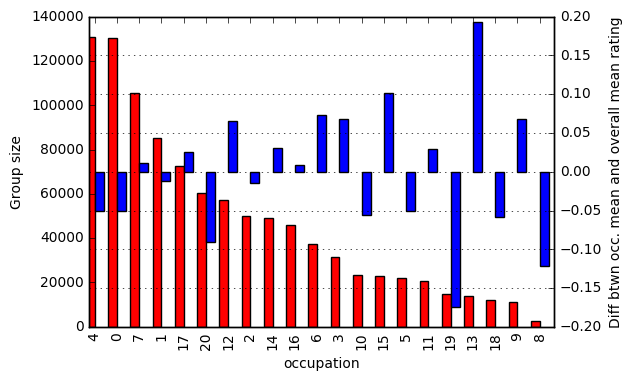

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
fig.title ="Occupations (ordered by group size, descending)"
ax.set_ylabel('Group size')
ax.grid(True)
ax2 = ax.twinx()
ax2.set_ylabel('Diff btwn occ. mean and overall mean rating')
ax.grid(True)
width = 0.4

occupation_size = data.groupby('occupation').size().sort_values(ascending=False)
occupation_size.plot(kind='bar', color='red', ax=ax, width=width, position=1)

occupation_means = data.groupby('occupation').rating.agg(np.mean).reindex(occupation_size.index.get_values())
mean_rating = occupation_means.mean()
(occupation_means-mean_rating).plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

plt.grid()

The above chart provides information about how certain occupations rate movies on average in comparison to the overal mean rating, sorted by the size of each group.  For example, writers (occupation #20) are more likely to give lower reviews than other occupations on average while retired viewers (#13) are more likely to give higher reviews on average.  Also note how (in general) the difference from the overal mean rating tends to increase as the occupational group size decreases, which makes sense given the fewer number of samples given.  This means the smaller occupational groups are most likely less informative than the larger ones.

The top largest occupations and their mean ratings are below:

In [36]:
top5_occupations = occupation_size[:5].index.get_values()
top5_occupation_means = data[data['occupation'].isin(top5_occupations)].groupby('occupation').agg({'rating': [np.size, np.mean]})['rating']
top5_occupation_means.sort_values(by='size', ascending=False)

,size,mean
occupation,,
4,131032,3.536793
0,130499,3.537544
7,105425,3.599772
1,85351,3.576642
17,72816,3.613574


These correspond to the following occupations:
	*  4:  "college/grad student"
	*  0:  "other" or not specified
	*  7:  "executive/managerial"
	*  1:  "academic/educator"
	* 17:  "technician/engineer"